In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

In [3]:
df = pd.concat([train_csv, test_csv])

In [4]:
# delete the id columns, they are not useful to us
del df['Unnamed: 0']
del df['id']

In [5]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
round(df.describe(), 2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,39.43,1190.32,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.71,15.09
std,15.12,997.45,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.07,38.47
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [8]:
df.info()
# We have 22 total features, 1 target value. Most of the features are Numerical, 5 of them are categorical. 
# The target variable is also categorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [9]:
# change column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
# check for unique values in categorical columns.
# get categorical columns and covert to list
categoricals = df.select_dtypes('object').columns.tolist()

In [24]:
unique_col_values = {}
# check for the unique vales in each column
# Change the values to lower case 
df_copy = df.copy()

for category in categoricals:
    unique_col_values[category] = df[category].unique().tolist()
    df_copy[category] = df_copy[category].str.lower().str.replace(' ', '_')
unique_col_values

{'gender': ['Male', 'Female'],
 'customer_type': ['Loyal Customer', 'disloyal Customer'],
 'type_of_travel': ['Personal Travel', 'Business travel'],
 'class': ['Eco Plus', 'Business', 'Eco'],
 'satisfaction': ['neutral or dissatisfied', 'satisfied']}

In [25]:
df_copy.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,male,loyal_customer,13,personal_travel,eco_plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral_or_dissatisfied
1,male,disloyal_customer,25,business_travel,business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral_or_dissatisfied
2,female,loyal_customer,26,business_travel,business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,female,loyal_customer,25,business_travel,business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral_or_dissatisfied
4,male,loyal_customer,61,business_travel,business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [12]:
target_data = df['satisfaction'].value_counts(True)

In [13]:
target_data

neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: satisfaction, dtype: float64

In [14]:
# The target data shows that more than half the people are unsatisfied with the flight.

([<matplotlib.patches.Wedge at 0x12f7a6450>,
 [Text(-0.22488421808296188, 1.0767669610724575, 'unsatisfied'),
  Text(0.22488411726876187, -1.0767669821276329, 'satisfied')],
 [Text(-0.12266411895434283, 0.5873274333122495, '56.6%'),
  Text(0.12266406396477919, -0.5873274447968906, '43.4%')])

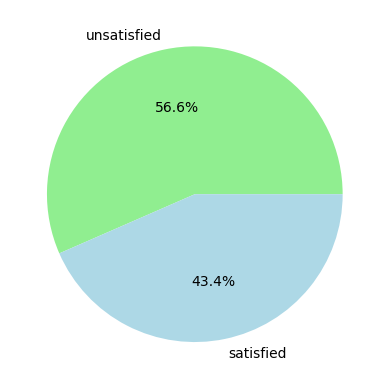

In [15]:
plt.pie(target_data, colors=['lightgreen', 'lightblue'], labels=['unsatisfied', 'satisfied'], autopct='%1.1f%%')